https://www.alvinang.sg/s/automobileEDA.csv



---



#1) Load and Glance the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://www.alvinang.sg/s/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1




---



#2) Generate a MR Equation

In [3]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression()

##2a) Define our Z and X

In [4]:
#X1 = 'horsepower'
#X2 = 'curb-weight'
#X3 = 'engine-size'
#X4 = 'highway-mpg'
#Z = 'price'

#That is Z = A + b2X2 + b3X3 + b4X4

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [5]:
lm.fit(Z, df['price'])

LinearRegression()

##2b) Find the Z Intercept

Z-Intercept refers to the A of the Z = A + b1X2 + b2X2 + b3X3 + b4X4

In [6]:
lm.intercept_

-15806.62462632922

##2c) Find the Gradient

Gradient refers to the b's of the Z = A + b1X1 + b2X2 + b3X3 + b4X4

In [7]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])



---



#3) Distribution Plot

##3a) Make a Prediction

In [8]:
Y_hat = lm.predict(Z)

##3b) Visualize the Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


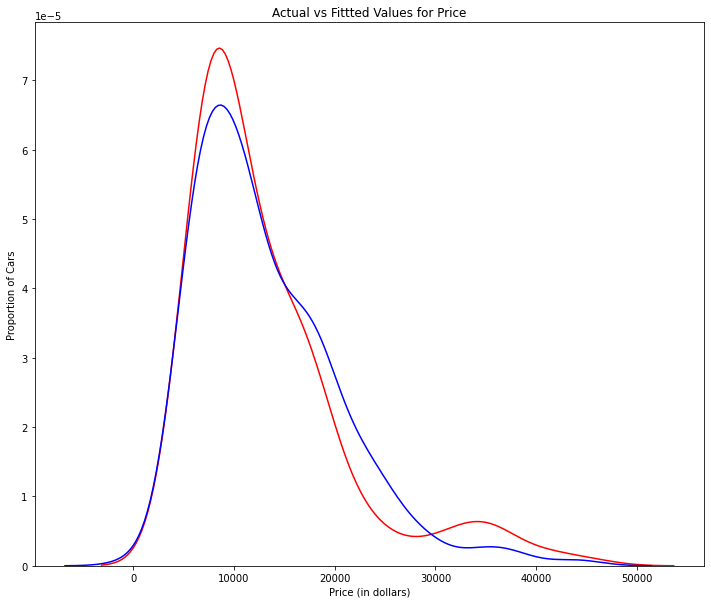

In [10]:
import seaborn as sns
%matplotlib inline
width = 12
height = 10

plt.figure(figsize = (width, height))
ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title('Actual vs Fittted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()



---



#4) Use R2 and MSE as Indicators to Determine the Accuracy of the MR Fit

##4a) Calulate the R2 for MR

###4a)(i) Fit the MR Model

In [11]:
lm.fit(Z, df['price'])

LinearRegression()

###4a)(ii) Find the R2

In [12]:
print('The R2 is: ', lm.score(Z, df['price']))

The R2 is:  0.8093562806577457


##4b) Calculate the MSE

###4b)(i) Do a Prediction

In [13]:
Y_predict_multifit = lm.predict(Z)

###4b)(ii) Find the MSE

In [14]:
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is:', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is: 11980366.87072649




---



#THE END



---

